https://blog.prokulski.science/index.php/2017/05/08/rowery-veturilo-i/

https://blog.prokulski.science/index.php/2017/05/12/rowery-veturilo-ii/

In [619]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# remove future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data = pd.read_csv('./konkurs/dane_prepared.csv')
pogoda = pd.read_csv('./konkurs/pogoda_2018.csv')

In [620]:
data.head(3)

,bike_num,start_time,end_time,departure,return,duration_sec,start_day,start_month,start_hour,start_minute,...,is_free,shop,route,dep_id,dep_lat,dep_lon,ret_id,ret_lat,ret_lon,distance
0,58745,2018-04-01 00:10:28,2018-04-01 00:20:28,Murapol Mariacka,KTBS – Krasińskiego 14,600,1,4,0,10,...,1,0,Murapol Mariacka - KTBS – Krasińskiego 14,5880,50.257215,19.028645,5883,50.255163,19.037121,0.646092
1,58388,2018-04-01 00:16:10,2018-04-01 00:20:17,Murapol Mariacka,KTBS – Krasińskiego 14,247,1,4,0,16,...,1,0,Murapol Mariacka - KTBS – Krasińskiego 14,5880,50.257215,19.028645,5883,50.255163,19.037121,0.646092
2,58547,2018-04-01 10:34:09,2018-04-01 10:41:38,KTBS – Krasińskiego 14,Katowice Rynek,449,1,4,10,34,...,1,0,KTBS – Krasińskiego 14 - Katowice Rynek,5883,50.255163,19.037121,5867,50.258697,19.021618,1.173327


In [621]:
pogoda.head(3)

,daynumber,dayofweek,meantemp,visib,wdsp,fog,prcp
0,365,2,33.9,5.9,7.1,0,0.38
1,364,1,36.6,4.0,9.9,0,0.07
2,363,7,37.7,4.0,7.5,0,0.05


In [622]:
# convert data from string to datetime
data['start_time'] = pd.to_datetime(data['start_time'], format='%Y-%m-%d %H:%M:%S')
data['end_time'] = pd.to_datetime(data['end_time'], format='%Y-%m-%d %H:%M:%S')
data['dayofyear'] = data['start_time'].dt.dayofyear

In [623]:
data.tail(3)

,bike_num,start_time,end_time,departure,return,duration_sec,start_day,start_month,start_hour,start_minute,...,shop,route,dep_id,dep_lat,dep_lon,ret_id,ret_lat,ret_lon,distance,dayofyear
171397,58590,2018-12-16 21:53:48,2018-12-16 21:56:22,Politechnika Śląska,KTBS – Krasińskiego 14,154,16,12,21,53,...,1,Politechnika Śląska - KTBS – Krasińskiego 14,5882,50.255403,19.032292,5883,50.255163,19.037121,0.345428,350
171398,58885,2018-12-16 22:13:44,2018-12-16 22:28:16,Silesia City Center,Plac Wolności,872,16,12,22,13,...,1,Silesia City Center - Plac Wolności,5878,50.269575,19.003708,5847,50.259690,19.014510,1.342515,350
171399,58374,2018-12-16 23:43:43,2018-12-16 23:51:27,Katowice Rynek,KTBS – Krasińskiego 14,464,16,12,23,43,...,1,Katowice Rynek - KTBS – Krasińskiego 14,5867,50.258697,19.021618,5883,50.255163,19.037121,1.173327,350


In [624]:
data.columns

Index(['bike_num', 'start_time', 'end_time', 'departure', 'return',
       'duration_sec', 'start_day', 'start_month', 'start_hour',
       'start_minute', 'month_day', 'duration_min', 'duration_hour',
       'which_day', 'daynumber', 'is_weekend', 'is_free', 'shop', 'route',
       'dep_id', 'dep_lat', 'dep_lon', 'ret_id', 'ret_lat', 'ret_lon',
       'distance', 'dayofyear'],
      dtype='object')

In [625]:
data = data.drop(columns = ['bike_num', 'start_time', 'end_time', 'departure', 'return',
       'duration_sec', 'start_hour', 'start_minute', 'duration_min', 'duration_hour',
       'which_day', 'route', 'dep_id', 'dep_lat', 'dep_lon', 'ret_id', 'ret_lat', 'ret_lon',
       'distance'])

In [626]:
sums = data.groupby('dayofyear').count().iloc[:,0]
sums.name = 'rental_sum'
sums

dayofyear
91      44
92     249
93     476
94     510
95     629
      ... 
346     79
347     42
348     65
349     50
350     26
Name: rental_sum, Length: 260, dtype: int64

In [627]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 171374
Data columns (total 8 columns):
start_day      260 non-null int64
start_month    260 non-null int64
month_day      260 non-null object
daynumber      260 non-null int64
is_weekend     260 non-null int64
is_free        260 non-null int64
shop           260 non-null int64
dayofyear      260 non-null int64
dtypes: int64(7), object(1)
memory usage: 18.3+ KB


In [628]:
data = pd.merge(data,sums,on='dayofyear')
data.head(3)

,start_day,start_month,month_day,daynumber,is_weekend,is_free,shop,dayofyear,rental_sum
0,1,4,2018-04-01,91,1,1,0,91,44
1,2,4,2018-04-02,92,0,1,2,92,249
2,3,4,2018-04-03,93,0,0,2,93,476


In [629]:
data = pd.merge(data,pogoda, on='daynumber')
data.head(3)

,start_day,start_month,month_day,daynumber,is_weekend,is_free,shop,dayofyear,rental_sum,dayofweek,meantemp,visib,wdsp,fog,prcp
0,1,4,2018-04-01,91,1,1,0,91,44,1,37.5,4.9,14.4,0,0.08
1,2,4,2018-04-02,92,0,1,2,92,249,2,38.0,6.5,13.0,0,0.02
2,3,4,2018-04-03,93,0,0,2,93,476,3,50.0,4.7,8.4,0,0.00


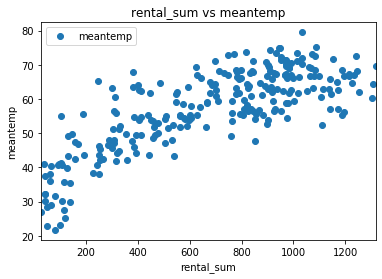

In [630]:
data.plot(x='rental_sum', y='meantemp', style='o')  
plt.title('rental_sum vs meantemp')  
plt.xlabel('rental_sum')  
plt.ylabel('meantemp')  
plt.show()

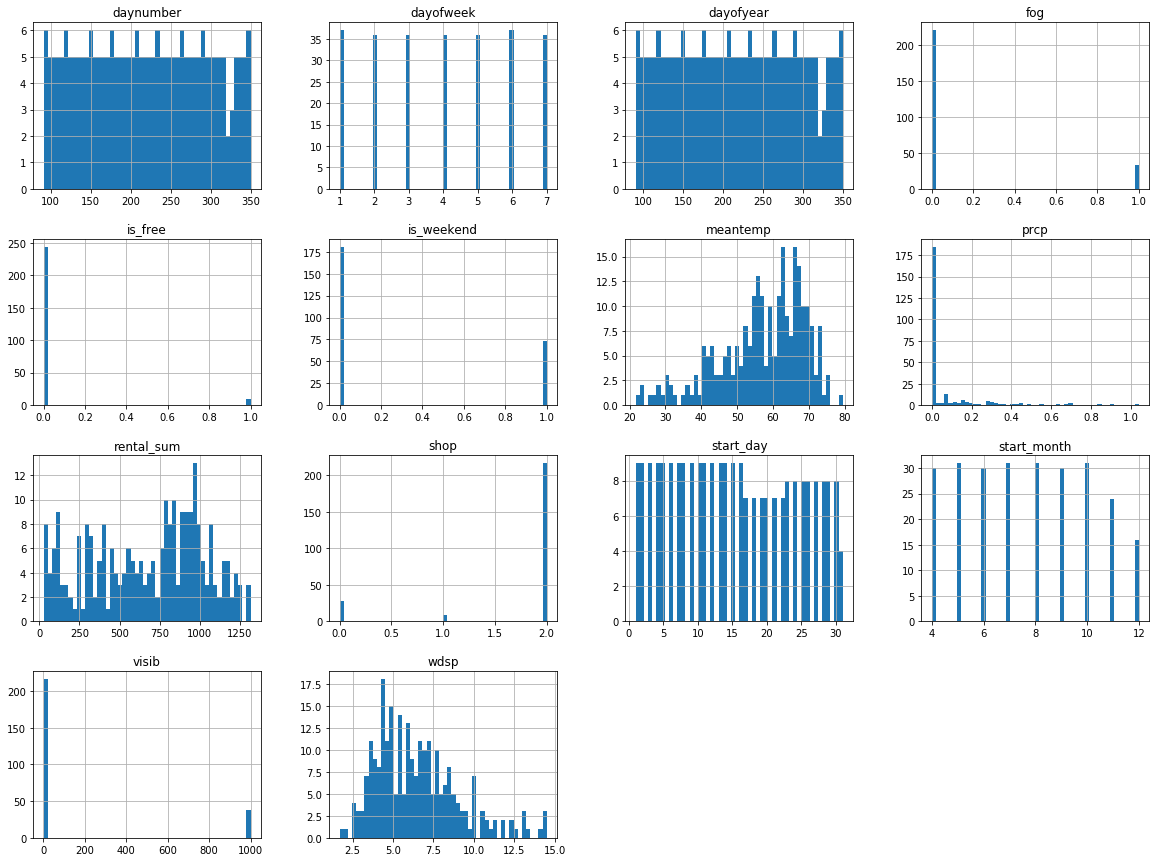

In [631]:
data.hist(bins=50,figsize=(20,15))
plt.show()

Brakuje danych dla dni od `2018-11-17` do `2018-11-22`:

In [632]:
data[(data.daynumber > 310) & (data.daynumber < 340)]

,start_day,start_month,month_day,daynumber,is_weekend,is_free,shop,dayofyear,rental_sum,dayofweek,meantemp,visib,wdsp,fog,prcp
220,7,11,2018-11-07,311,0,0,2,311,413,4,49.6,4.5,5.9,0,0.00
221,8,11,2018-11-08,312,0,0,2,312,394,5,44.1,2.4,3.9,1,0.00
222,9,11,2018-11-09,313,0,0,2,313,357,6,42.1,0.9,1.7,1,0.00
223,10,11,2018-11-10,314,1,0,2,314,318,7,44.2,1.1,3.5,1,0.00
224,11,11,2018-11-11,315,1,1,0,315,310,1,48.0,3.4,7.7,0,0.00
225,12,11,2018-11-12,316,0,1,2,316,310,2,47.0,2.3,4.0,1,0.00
226,13,11,2018-11-13,317,0,0,2,317,327,3,51.2,4.4,7.4,0,0.00
227,14,11,2018-11-14,318,0,0,2,318,254,4,45.3,5.7,7.4,0,0.06
228,15,11,2018-11-15,319,0,0,2,319,256,5,42.2,3.9,3.7,1,0.02
229,16,11,2018-11-16,320,0,0,2,320,227,6,38.5,6.2,9.2,0,0.00


## Parametr: visib

38 błędnych pomiarów widocznosci (wskazanie `999.9`), maksymalny poprawny pomiar to 12.4

In [633]:
data[(data.visib > 12) & (data.visib < 999)]

,start_day,start_month,month_day,daynumber,is_weekend,is_free,shop,dayofyear,rental_sum,dayofweek,meantemp,visib,wdsp,fog,prcp
4,5,4,2018-04-05,95,0,0,2,95,629,5,55.4,12.4,10.0,0,0.0


Zamiana błędnych wskazań na `-1`

In [634]:
#data['visib'] = data['visib'].apply(lambda x: 0 if x > 999 else x)

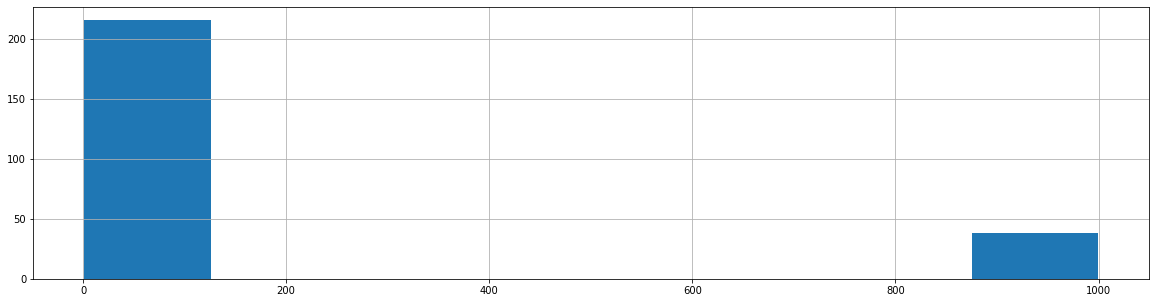

In [635]:
data['visib'].hist(bins=8,figsize=(20,5))
plt.show()

## Parametr: prcp

In [636]:
#data['prcp'] = data['prcp'].apply(lambda x: 0 if x <= 0.1 else 1)

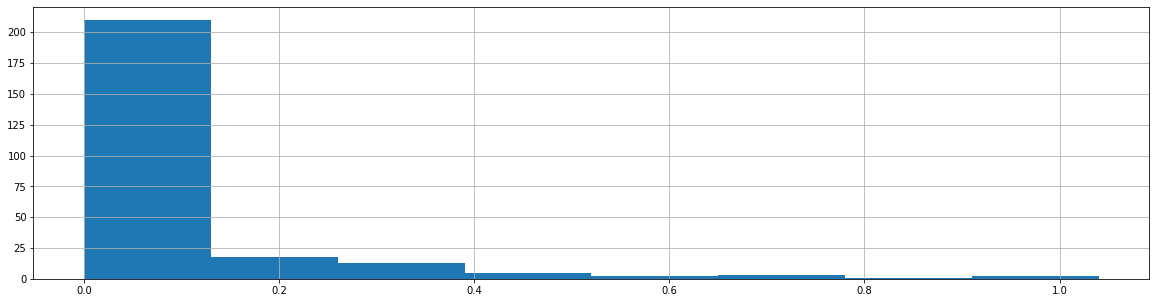

In [637]:
data['prcp'].hist(bins=8,figsize=(20,5))
plt.show()

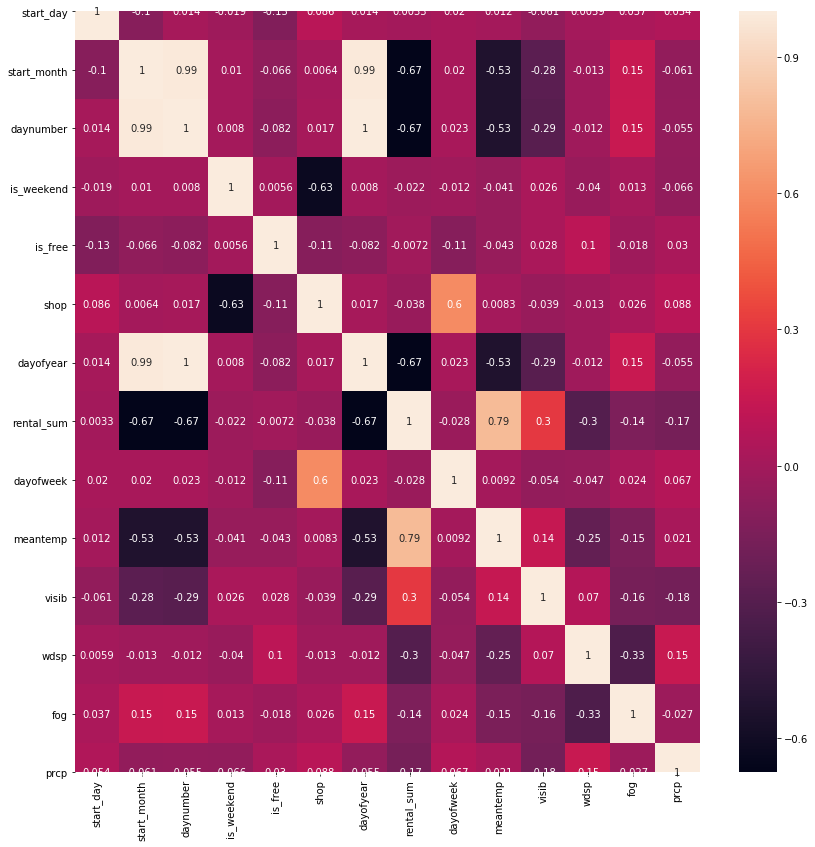

In [638]:
corr_matrix = data.corr()
import seaborn as sns

plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot = True);

In [639]:
data['rental_sum'].mean()

672.1102362204724

In [640]:
data.head(3)

,start_day,start_month,month_day,daynumber,is_weekend,is_free,shop,dayofyear,rental_sum,dayofweek,meantemp,visib,wdsp,fog,prcp
0,1,4,2018-04-01,91,1,1,0,91,44,1,37.5,4.9,14.4,0,0.08
1,2,4,2018-04-02,92,0,1,2,92,249,2,38.0,6.5,13.0,0,0.02
2,3,4,2018-04-03,93,0,0,2,93,476,3,50.0,4.7,8.4,0,0.00


In [641]:
# bikes - Dataframe z usuniętą kolumną rental_sum
bikes = data.drop("rental_sum", axis=1)

# bikes_labels - koluma z wypożyczeniami
bikes_labels = data["rental_sum"].copy()

In [642]:
from sklearn.model_selection import train_test_split
bikes_train, bikes_test, label_train, label_test = train_test_split(bikes,bikes_labels,test_size=0.3, random_state=1138)

print(bikes_train.shape, label_train.shape)
print(bikes_test.shape, label_test.shape)

(177, 14) (177,)
(77, 14) (77,)


In [643]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#parametry dyskretne
cat_attribs = ['start_month', 'is_weekend', 'is_free', 'shop']

#parametry ciągłe
num_attribs = ['meantemp', 'visib', 'wdsp', 'prcp']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [644]:
#1
bikes_train_encoded = full_pipeline.fit_transform(bikes_train)

#2
lin_reg = LinearRegression()
lin_reg.fit(bikes_train_encoded, label_train)

#3
bikes_test_encoded = full_pipeline.fit_transform(bikes_test)

#3
pred = lin_reg.predict(bikes_test_encoded)

#4
lin_mse = mean_squared_error(label_test, pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

186.70513080218797

### Wyniki

#parametry dyskretne: 
cat_attribs = ['dayofweek', 'start_day', 'start_month', 'is_weekend', 'is_free', 'shop']

#parametry ciągłe: 
num_attribs = ['meantemp', 'visib', 'wdsp', 'prcp']

`222.1698257585845`

-----------------------------

#parametry dyskretne: 
cat_attribs = ['dayofweek', 'prcp', 'start_month', 'is_weekend', 'is_free', 'shop']

#parametry ciągłe: 
num_attribs = ['meantemp', 'visib', 'wdsp']

`194.99667541527018`

-----------------------------

#parametry dyskretne: 
cat_attribs = ['dayofweek','start_month', 'is_weekend', 'is_free', 'shop']

#parametry ciągłe: 
num_attribs = ['meantemp', 'visib', 'wdsp', 'prcp']

`192.1735102477771`

-----------------------------

#parametry dyskretne
cat_attribs = ['start_month', 'is_weekend', 'is_free', 'shop']

#parametry ciągłe
num_attribs = ['meantemp', 'visib', 'wdsp', 'prcp']

`186.70513080218797`